In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv('sub_labor_BCDEHIMNQRSTC.csv')

In [3]:
def preprocess(df):
    
    #drop column
    # Convert column names to lowercase
    # Split date into day, month, year
    #get the day of the week from date
    
    df.drop('Unnamed: 0', inplace = True, axis = 1)                             
    df.columns = df.columns.str.lower()                                         
    df[["month", "day", "year"]] = df["date"].str.split("/", expand = True)    
    df['weekday'] = pd.to_datetime(df['date']).dt.day_name()
    
    

    #drop date after split
    df = df.drop('date', axis=1)
    
    
    return df


df = preprocess(df)
df
    

,location,tcode,mcode,store,ucode,workid,sn,crew_size,labor_hours,start_time,stop_time,categ,month,day,year,weekday
0,365,89.0,1181.0,19,448,8728,1,3,7.5,19.30,22.00,6,1,1,2010,Friday
1,296,71.0,354.0,27,1751,9873,2,3,11.8,16.30,20.25,15,1,2,2010,Saturday
2,306,NaN,NaN,19,54,9977,1,3,21.0,17.00,0.00,15,1,2,2010,Saturday
3,306,88.0,1048.0,19,208,5163,1,3,21.0,17.00,0.00,15,1,2,2010,Saturday
4,325,71.0,354.0,27,1751,10107,1,3,11.8,16.30,20.25,15,1,2,2010,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547305,9216,88.0,1048.0,45,208,318075,1,2,1.5,19.45,20.30,15,9,30,2021,Thursday
547306,9216,89.0,557.0,45,208,318075,1,2,1.5,18.00,18.45,15,9,30,2021,Thursday
547307,9239,88.0,1048.0,45,219,317885,1,2,0.1,17.11,17.12,15,9,30,2021,Thursday
547308,9239,88.0,1048.0,45,219,317886,1,2,0.1,17.11,17.12,15,9,30,2021,Thursday


In [4]:
df['labor_hours'].describe()

count    547310.000000
mean          5.694983
std          10.423412
min           0.000000
25%           0.500000
50%           1.800000
75%           5.800000
max         155.400000
Name: labor_hours, dtype: float64

<AxesSubplot:>

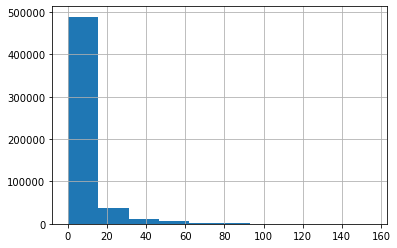

In [5]:
df.labor_hours.hist() #analyze plot for target variable

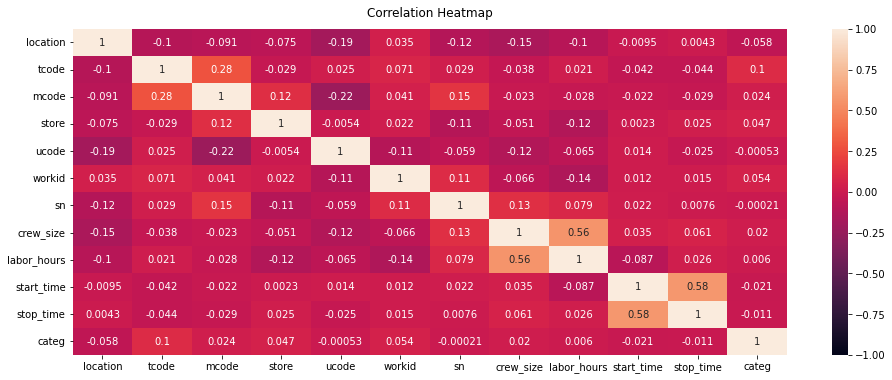

In [6]:
plt.figure(figsize = (16,6))

heatmap = sns.heatmap(df.corr(), vmin = -1, vmax=1, annot =True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [7]:
#since crew size has higher correlation we'll further analyze that
df.crew_size.value_counts().sort_index()

0        99
1     81483
2    230102
3    123793
4     48085
5     33194
6     11828
7      8867
8      5630
9      4229
Name: crew_size, dtype: int64

In [8]:
# Drop rows where crew_number = 0
df = df[df.crew_size != 0]

In [9]:
#group by crew size and get mean value for target variable
data = df.copy()
avg_per_crewSize = data.groupby('crew_size')['labor_hours'].mean().reset_index().sort_values('crew_size',ascending = False)
avg_per_crewSize 



,crew_size,labor_hours
8,9,28.311705
7,8,34.537691
6,7,21.702154
5,6,21.155994
4,5,15.642857
3,4,9.332734
2,3,5.333965
1,2,2.934525
0,1,0.693345


<BarContainer object of 9 artists>

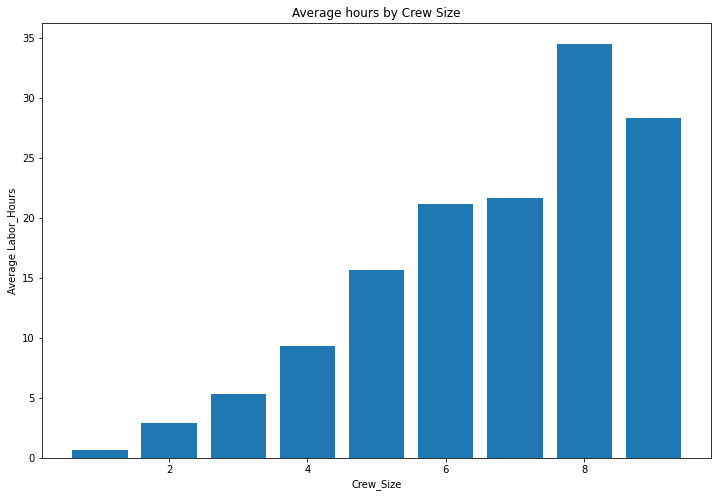

In [10]:
x=avg_per_crewSize['crew_size']
y=avg_per_crewSize['labor_hours']
plt.figure(figsize=[12,8])
plt.xlabel('Crew_Size')
plt.ylabel('Average Labor_Hours')
plt.title('Average hours by Crew Size')
plt.bar(x,y)

In [19]:
df.isnull().sum()

location       0
tcode          0
mcode          0
store          0
ucode          0
workid         0
sn             0
crew_size      0
labor_hours    0
start_time     0
stop_time      0
categ          0
month          0
day            0
year           0
weekday        0
dtype: int64

In [15]:
df['tcode'] = df['tcode'].fillna(df['tcode'].mode()[0])

/var/folders/66/blzn8pmx1n5d75cp73my5ddr0000gn/T/ipykernel_1578/2309213275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tcode'] = df['tcode'].fillna(df['tcode'].mode()[0])


In [17]:
# Map NA values to -1 in df
# df['tcode'] = df['tcode'].fillna('Other')

In [18]:
# Map NA values to -1 in df
df['mcode'] = df['mcode'].fillna(df['mcode'].mode()[0])

/var/folders/66/blzn8pmx1n5d75cp73my5ddr0000gn/T/ipykernel_1578/1263442117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mcode'] = df['mcode'].fillna(df['mcode'].mode()[0])


In [20]:
df.isnull().sum()

location       0
tcode          0
mcode          0
store          0
ucode          0
workid         0
sn             0
crew_size      0
labor_hours    0
start_time     0
stop_time      0
categ          0
month          0
day            0
year           0
weekday        0
dtype: int64

In [21]:
#split the dataset into train test so any feature engineering does not risk data leakage

train, test = train_test_split(df, test_size=0.2)

In [22]:
train.shape,test.shape,df.shape

((437768, 16), (109443, 16), (547211, 16))

In [23]:
train['kfold']=-1

/var/folders/66/blzn8pmx1n5d75cp73my5ddr0000gn/T/ipykernel_1578/594480657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['kfold']=-1


In [24]:
train.reset_index(inplace=True)

In [25]:
kf = model_selection.KFold(n_splits=5,shuffle=True,random_state=42)
for fold,(train_indicies,valid_indicies) in enumerate(kf.split(X=train)):
    train.loc[valid_indicies,'kfold']=fold
    

/Users/yongalhamo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
train.head()

,index,location,tcode,mcode,store,ucode,workid,sn,crew_size,labor_hours,start_time,stop_time,categ,month,day,year,weekday,kfold
0,387500,9449,89.0,504.0,77,2541,217252,1,3,2.0,20.10,20.50,15,1,12,2018,Friday,1
1,533280,5612,76.0,354.0,55,1316,292540,1,2,2.0,13.00,14.00,15,10,29,2020,Thursday,3
2,287486,761,88.0,1048.0,64,53,143787,1,4,25.0,16.45,23.00,15,3,17,2015,Tuesday,1
3,171809,591,88.0,1050.0,80,0,1341,1,6,45.0,15.00,22.30,15,2,19,2014,Wednesday,3
4,307280,843,88.0,1050.0,64,0,182001,1,1,0.1,15.01,15.02,15,9,15,2016,Thursday,2


In [27]:
train=train.drop('index', axis=1)
train

,location,tcode,mcode,store,ucode,workid,sn,crew_size,labor_hours,start_time,stop_time,categ,month,day,year,weekday,kfold
0,9449,89.0,504.0,77,2541,217252,1,3,2.0,20.10,20.50,15,1,12,2018,Friday,1
1,5612,76.0,354.0,55,1316,292540,1,2,2.0,13.00,14.00,15,10,29,2020,Thursday,3
2,761,88.0,1048.0,64,53,143787,1,4,25.0,16.45,23.00,15,3,17,2015,Tuesday,1
3,591,88.0,1050.0,80,0,1341,1,6,45.0,15.00,22.30,15,2,19,2014,Wednesday,3
4,843,88.0,1050.0,64,0,182001,1,1,0.1,15.01,15.02,15,9,15,2016,Thursday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437763,260,88.0,1048.0,29,53,287386,13,4,0.3,16.15,16.20,15,6,4,2020,Thursday,0
437764,410,88.0,1048.0,77,2705,270316,10,3,0.8,18.45,19.00,15,1,15,2020,Wednesday,1
437765,820,88.0,1048.0,75,981,179903,1,2,0.1,13.00,13.01,15,6,24,2016,Friday,1
437766,3860,88.0,1048.0,60,76,106854,1,3,10.5,12.30,16.00,13,10,8,2013,Tuesday,0


In [28]:
train.kfold.value_counts()

1    87554
2    87554
0    87554
3    87553
4    87553
Name: kfold, dtype: int64

<AxesSubplot:>

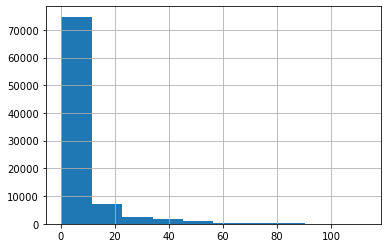

In [29]:
train[train.kfold==2].labor_hours.hist()

In [30]:
train.to_csv("train.csv", index=False)

In [31]:
test.to_csv('test.csv', index=False)

In [32]:
df

,location,tcode,mcode,store,ucode,workid,sn,crew_size,labor_hours,start_time,stop_time,categ,month,day,year,weekday
0,365,89.0,1181.0,19,448,8728,1,3,7.5,19.30,22.00,6,1,1,2010,Friday
1,296,71.0,354.0,27,1751,9873,2,3,11.8,16.30,20.25,15,1,2,2010,Saturday
2,306,88.0,1048.0,19,54,9977,1,3,21.0,17.00,0.00,15,1,2,2010,Saturday
3,306,88.0,1048.0,19,208,5163,1,3,21.0,17.00,0.00,15,1,2,2010,Saturday
4,325,71.0,354.0,27,1751,10107,1,3,11.8,16.30,20.25,15,1,2,2010,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547305,9216,88.0,1048.0,45,208,318075,1,2,1.5,19.45,20.30,15,9,30,2021,Thursday
547306,9216,89.0,557.0,45,208,318075,1,2,1.5,18.00,18.45,15,9,30,2021,Thursday
547307,9239,88.0,1048.0,45,219,317885,1,2,0.1,17.11,17.12,15,9,30,2021,Thursday
547308,9239,88.0,1048.0,45,219,317886,1,2,0.1,17.11,17.12,15,9,30,2021,Thursday
